# Batch Processing Experiments

This notebook provides a framework for running experiments on multiple EARS data files.

## Features

- **Data Discovery**: Find and select data files
- **Pipeline Processing**: Run consistent analysis on multiple files
- **Performance Monitoring**: Track timing and efficiency
- **Result Collection**: Aggregate and summarize results
- **Error Handling**: Gracefully handle failures

## Workflow

1. Discover available data files
2. Select a subset for experiments
3. Define a processing pipeline
4. Run batch processing
5. Analyze results

In [1]:
# Import required libraries
import dolphain
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

%matplotlib inline

## Step 1: Discover Available Data

Find all EARS data files in the `data/` directory.

In [2]:
# Find all .210 files
all_files = dolphain.find_data_files(r'../data/Buoy210_100300_100399/', '*')

print(f"Found {len(all_files)} total data files")
print(f"\nFirst 5 files:")
for f in all_files[:5]:
    print(f"  {f}")

Found 100 total data files

First 5 files:
  ../data/Buoy210_100300_100399/718586EF.210
  ../data/Buoy210_100300_100399/71858701.210
  ../data/Buoy210_100300_100399/71858713.210
  ../data/Buoy210_100300_100399/71858725.210
  ../data/Buoy210_100300_100399/71858737.210


## Step 2: Select Random Subset

For experiments, select a random subset of files. Using a fixed seed ensures reproducibility.

In [3]:
# Select 10 random files with reproducible seed
selected_files = dolphain.select_random_files(all_files, n=10, seed=42)

print(f"Selected {len(selected_files)} files for experiment:")
for i, f in enumerate(selected_files, 1):
    print(f"{i:2d}. {f.name}")

Selected 10 files for experiment:
 1. 718586EF.210
 2. 718587A3.210
 3. 718587E4.210
 4. 718587F5.210
 5. 718587FA.210
 6. 718587FB.210
 7. 71858803.210
 8. 71858815.210
 9. 7185881F.210
10. 71858823.210


## Experiment 1: Basic File Statistics

A simple pipeline that extracts basic statistics from each file.

In [4]:
def basic_stats_pipeline(filepath):
    """
    Extract basic statistics from an EARS file.
    
    Returns
    -------
    dict
        Dictionary with duration, samples, RMS, peak amplitude, etc.
    """
    # Read file
    data = dolphain.read_ears_file(filepath)
    
    # Extract acoustic data
    acoustic = data['data']
    
    # Calculate statistics
    results = {
        'duration': data['duration'],
        'n_samples': data['n_samples'],
        'fs': data['fs'],
        'mean': np.mean(acoustic),
        'std': np.std(acoustic),
        'rms': np.sqrt(np.mean(acoustic**2)),
        'peak': np.max(np.abs(acoustic)),
        'zero_crossings': np.sum(np.diff(np.sign(acoustic)) != 0),
    }
    
    return results

In [5]:
# Run the pipeline
processor = dolphain.BatchProcessor(verbose=True)
collector = processor.process_files(selected_files, basic_stats_pipeline)


Processing 10 files...
----------------------------------------------------------------------
✓ 718586EF.210 (0.18s)
✓ 718587A3.210 (0.17s)
✓ 718587E4.210 (0.17s)
✓ 718587A3.210 (0.17s)
✓ 718587E4.210 (0.17s)
✓ 718587F5.210 (0.17s)
✓ 718587FA.210 (0.17s)
✓ 718587F5.210 (0.17s)
✓ 718587FA.210 (0.17s)
✓ 718587FB.210 (0.18s)
✓ 71858803.210 (0.17s)
✓ 718587FB.210 (0.18s)
✓ 71858803.210 (0.17s)
✓ 71858815.210 (0.17s)
✓ 7185881F.210 (0.17s)
✓ 71858815.210 (0.17s)
✓ 7185881F.210 (0.17s)
✓ 71858823.210 (0.17s)
----------------------------------------------------------------------
Completed in 1.73s

✓ 71858823.210 (0.17s)
----------------------------------------------------------------------
Completed in 1.73s



In [6]:
# Print summary
collector.print_summary()

BATCH PROCESSING SUMMARY
Total files processed: 10
Successful: 10
Failed: 0
Success rate: 100.0%

----------------------------------------------------------------------
TIMING STATISTICS
----------------------------------------------------------------------

per_file:
  Total: 1.73s
  Mean:  0.173s ± 0.004s
  Range: [0.166s, 0.183s]

total_batch:
  Total: 1.73s
  Mean:  1.729s ± 0.000s
  Range: [1.729s, 1.729s]

----------------------------------------------------------------------
METRIC STATISTICS
----------------------------------------------------------------------

duration:
  Mean:   21.333 ± 0.000
  Median: 21.333
  Range:  [21.333, 21.333]

n_samples:
  Mean:   4096000.000 ± 0.000
  Median: 4096000.000
  Range:  [4096000.000, 4096000.000]

fs:
  Mean:   192000.000 ± 0.000
  Median: 192000.000
  Range:  [192000.000, 192000.000]

mean:
  Mean:   125.254 ± 0.144
  Median: 125.223
  Range:  [125.062, 125.569]

std:
  Mean:   12.264 ± 2.504
  Median: 10.920
  Range:  [10.150, 17.187

In [7]:
# Convert results to DataFrame for easy analysis
df_stats = pd.DataFrame(collector.results)
print("\nDataFrame Preview:")
df_stats.head()


DataFrame Preview:


,file,duration,n_samples,fs,mean,std,rms,peak,zero_crossings
0,../data/Buoy210_100300_100399/718586EF.210,21.333333,4096000,192000,125.381258,16.928601,126.518921,193.0,0
1,../data/Buoy210_100300_100399/718587A3.210,21.333333,4096000,192000,125.140571,12.979992,125.811933,438.0,994
2,../data/Buoy210_100300_100399/718587E4.210,21.333333,4096000,192000,125.155630,10.922440,125.631332,185.0,0
3,../data/Buoy210_100300_100399/718587F5.210,21.333333,4096000,192000,125.205272,10.782649,125.668714,187.0,0
4,../data/Buoy210_100300_100399/718587FA.210,21.333333,4096000,192000,125.273398,11.468345,125.797246,180.0,0


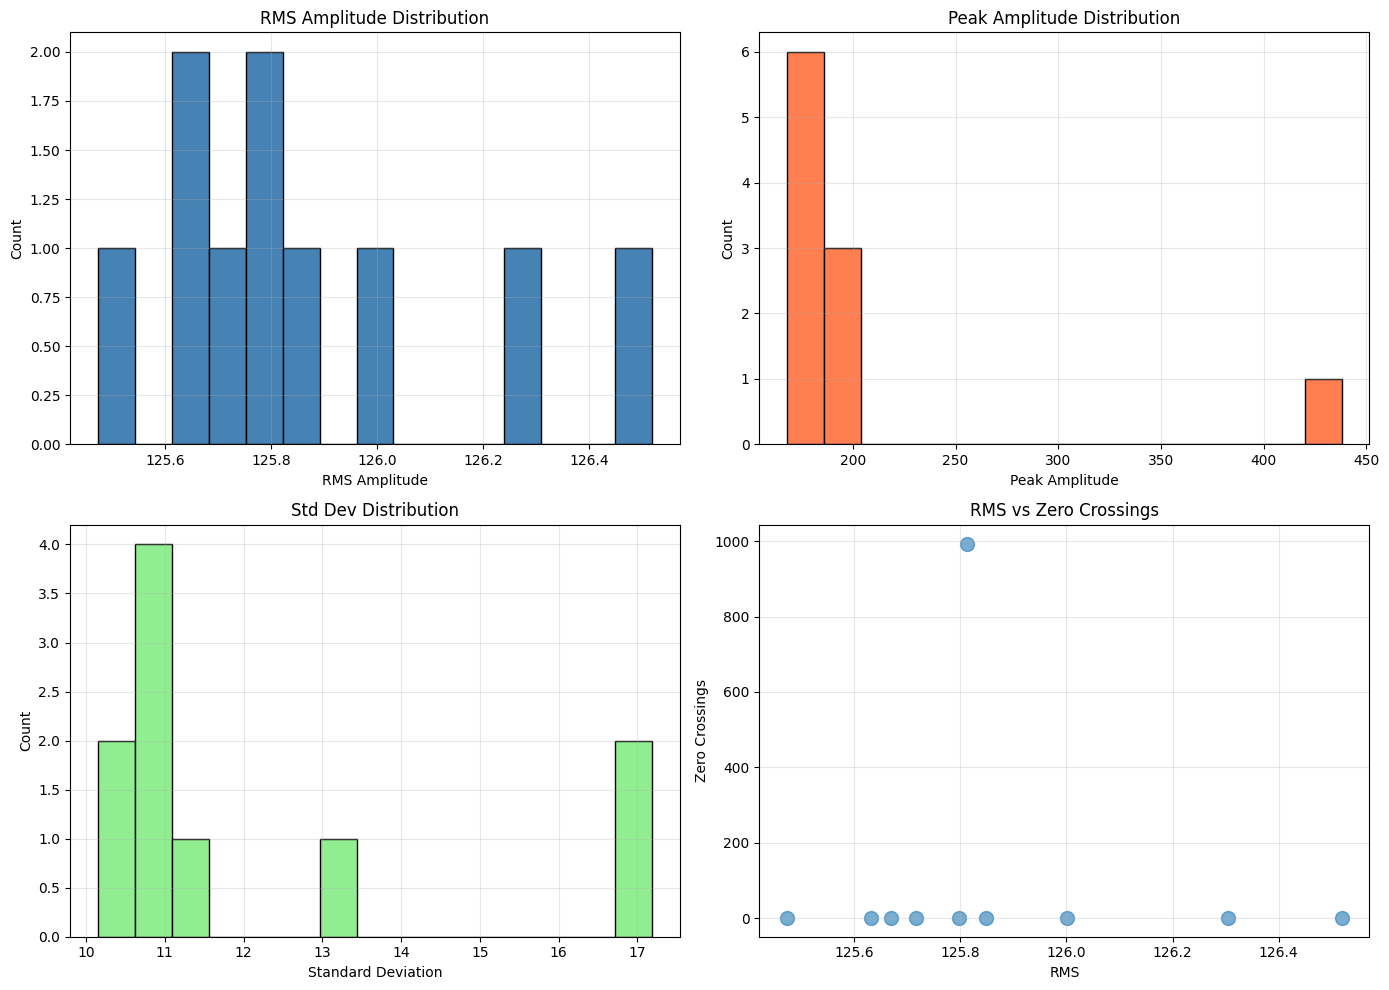

In [8]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMS distribution
axes[0, 0].hist(df_stats['rms'], bins=15, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('RMS Amplitude')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('RMS Amplitude Distribution')
axes[0, 0].grid(True, alpha=0.3)

# Peak amplitude distribution
axes[0, 1].hist(df_stats['peak'], bins=15, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Peak Amplitude')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Peak Amplitude Distribution')
axes[0, 1].grid(True, alpha=0.3)

# Standard deviation distribution
axes[1, 0].hist(df_stats['std'], bins=15, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Standard Deviation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Std Dev Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Zero crossings
axes[1, 1].scatter(df_stats['rms'], df_stats['zero_crossings'], alpha=0.6, s=100)
axes[1, 1].set_xlabel('RMS')
axes[1, 1].set_ylabel('Zero Crossings')
axes[1, 1].set_title('RMS vs Zero Crossings')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Experiment 2: Wavelet Denoising Performance

Test wavelet denoising on multiple files and measure:
- Noise reduction effectiveness
- Processing time
- Threshold values used

In [9]:
def denoising_pipeline(filepath):
    """
    Apply wavelet denoising and measure performance.
    
    Returns
    -------
    dict
        Dictionary with original and denoised statistics
    """
    # Read file
    data = dolphain.read_ears_file(filepath)
    acoustic = data['data']
    
    # Original statistics
    original_rms = np.sqrt(np.mean(acoustic**2))
    original_peak = np.max(np.abs(acoustic))
    
    # Time the denoising
    with dolphain.timer("Wavelet denoising", verbose=False) as t:
        denoised, threshold = dolphain.wavelet_denoise(
            acoustic, 
            return_threshold=True
        )
    
    # Denoised statistics
    denoised_rms = np.sqrt(np.mean(denoised**2))
    denoised_peak = np.max(np.abs(denoised))
    
    # Calculate noise estimate
    noise = acoustic - denoised
    noise_rms = np.sqrt(np.mean(noise**2))
    
    # SNR improvement estimate
    if noise_rms > 0:
        snr_improvement = 10 * np.log10(original_rms / noise_rms)
    else:
        snr_improvement = np.inf
    
    results = {
        'duration': data['duration'],
        'threshold_used': threshold,
        'original_rms': original_rms,
        'denoised_rms': denoised_rms,
        'noise_rms': noise_rms,
        'rms_reduction_pct': (1 - denoised_rms / original_rms) * 100,
        'peak_reduction_pct': (1 - denoised_peak / original_peak) * 100,
        'snr_improvement_db': snr_improvement,
        'processing_time': t.elapsed,
    }
    
    return results

In [10]:
# Run denoising experiment
processor2 = dolphain.BatchProcessor(verbose=True)
collector2 = processor2.process_files(selected_files, denoising_pipeline)


Processing 10 files...
----------------------------------------------------------------------
✓ 718586EF.210 (0.46s)
✓ 718586EF.210 (0.46s)
✓ 718587A3.210 (0.47s)
✓ 718587A3.210 (0.47s)
✓ 718587E4.210 (0.51s)
✓ 718587E4.210 (0.51s)
✓ 718587F5.210 (0.48s)
✓ 718587F5.210 (0.48s)
✓ 718587FA.210 (0.47s)
✓ 718587FA.210 (0.47s)
✓ 718587FB.210 (0.47s)
✓ 718587FB.210 (0.47s)
✓ 71858803.210 (0.48s)
✓ 71858803.210 (0.48s)
✓ 71858815.210 (0.48s)
✓ 71858815.210 (0.48s)
✓ 7185881F.210 (0.48s)
✓ 7185881F.210 (0.48s)
✓ 71858823.210 (0.47s)
----------------------------------------------------------------------
Completed in 4.76s

✓ 71858823.210 (0.47s)
----------------------------------------------------------------------
Completed in 4.76s



In [11]:
# Print summary
collector2.print_summary()

BATCH PROCESSING SUMMARY
Total files processed: 10
Successful: 10
Failed: 0
Success rate: 100.0%

----------------------------------------------------------------------
TIMING STATISTICS
----------------------------------------------------------------------

per_file:
  Total: 4.76s
  Mean:  0.476s ± 0.013s
  Range: [0.457s, 0.511s]

total_batch:
  Total: 4.76s
  Mean:  4.761s ± 0.000s
  Range: [4.761s, 4.761s]

----------------------------------------------------------------------
METRIC STATISTICS
----------------------------------------------------------------------

duration:
  Mean:   21.333 ± 0.000
  Median: 21.333
  Range:  [21.333, 21.333]

threshold_used:
  Mean:   12.759 ± 5.983
  Median: 9.741
  Range:  [9.719, 24.753]

original_rms:
  Mean:   125.877 ± 0.302
  Median: 125.805
  Range:  [125.473, 126.519]

denoised_rms:
  Mean:   11.007 ± 2.038
  Median: 9.914
  Range:  [9.161, 15.041]

noise_rms:
  Mean:   125.304 ± 0.153
  Median: 125.259
  Range:  [125.091, 125.598]

rms_

In [12]:
# Convert to DataFrame
df_denoise = pd.DataFrame(collector2.results)
print("\nDenoising Results:")
df_denoise.head()


Denoising Results:


,file,duration,threshold_used,original_rms,denoised_rms,noise_rms,rms_reduction_pct,peak_reduction_pct,snr_improvement_db,processing_time
0,../data/Buoy210_100300_100399/718586EF.210,21.333333,24.752512,126.518921,14.674868,125.533230,88.401048,72.738531,0.033968,0.283661
1,../data/Buoy210_100300_100399/718587A3.210,21.333333,10.012879,125.811933,11.744881,125.185142,90.664732,30.593889,0.021690,0.286543
2,../data/Buoy210_100300_100399/718587E4.210,21.333333,9.738575,125.631332,9.912724,125.184508,92.109672,70.184421,0.015474,0.325484
3,../data/Buoy210_100300_100399/718587F5.210,21.333333,9.719153,125.668714,9.774175,125.229576,92.222269,74.194256,0.015203,0.292724
4,../data/Buoy210_100300_100399/718587FA.210,21.333333,9.742405,125.797246,10.518933,125.294838,91.638185,73.696084,0.017380,0.290880


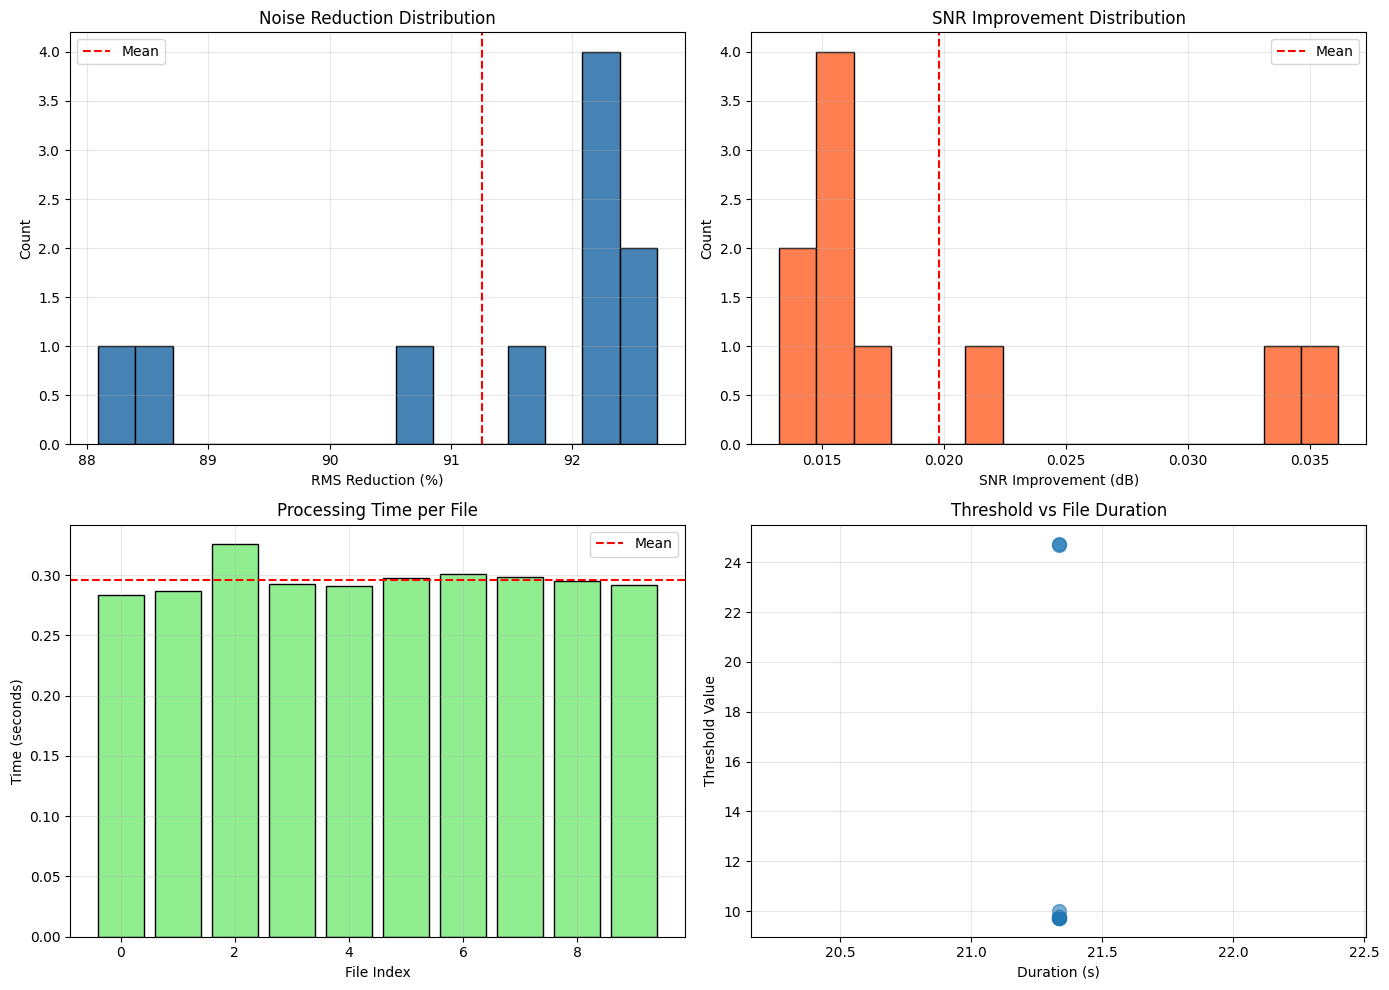

In [13]:
# Visualize denoising performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMS reduction
axes[0, 0].hist(df_denoise['rms_reduction_pct'], bins=15, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('RMS Reduction (%)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Noise Reduction Distribution')
axes[0, 0].axvline(df_denoise['rms_reduction_pct'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# SNR improvement
axes[0, 1].hist(df_denoise['snr_improvement_db'], bins=15, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('SNR Improvement (dB)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('SNR Improvement Distribution')
axes[0, 1].axvline(df_denoise['snr_improvement_db'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Processing time
axes[1, 0].bar(range(len(df_denoise)), df_denoise['processing_time'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('File Index')
axes[1, 0].set_ylabel('Time (seconds)')
axes[1, 0].set_title('Processing Time per File')
axes[1, 0].axhline(df_denoise['processing_time'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Threshold vs Duration
axes[1, 1].scatter(df_denoise['duration'], df_denoise['threshold_used'], alpha=0.6, s=100)
axes[1, 1].set_xlabel('Duration (s)')
axes[1, 1].set_ylabel('Threshold Value')
axes[1, 1].set_title('Threshold vs File Duration')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Experiment 3: Compare Multiple Wavelets

Test different wavelet types and compare their performance.

In [14]:
def multi_wavelet_pipeline(filepath):
    """
    Test multiple wavelet types and compare results.
    
    Returns
    -------
    dict
        Dictionary with results for each wavelet type
    """
    # Read file
    data = dolphain.read_ears_file(filepath)
    acoustic = data['data']
    
    original_rms = np.sqrt(np.mean(acoustic**2))
    
    wavelets = ['db4', 'db8', 'db20', 'sym8']
    results = {'duration': data['duration']}
    
    for wavelet in wavelets:
        with dolphain.timer(f"Wavelet {wavelet}", verbose=False) as t:
            denoised, threshold = dolphain.wavelet_denoise(
                acoustic,
                wavelet=wavelet,
                return_threshold=True
            )
        
        denoised_rms = np.sqrt(np.mean(denoised**2))
        reduction = (1 - denoised_rms / original_rms) * 100
        
        results[f'{wavelet}_reduction_pct'] = reduction
        results[f'{wavelet}_threshold'] = threshold
        results[f'{wavelet}_time'] = t.elapsed
    
    return results

In [15]:
# Run on a smaller subset for speed
test_files = selected_files[:5]

processor3 = dolphain.BatchProcessor(verbose=True)
collector3 = processor3.process_files(test_files, multi_wavelet_pipeline)


Processing 5 files...
----------------------------------------------------------------------
✓ 718586EF.210 (0.85s)
✓ 718586EF.210 (0.85s)
✓ 718587A3.210 (0.89s)
✓ 718587A3.210 (0.89s)
✓ 718587E4.210 (0.90s)
✓ 718587E4.210 (0.90s)
✓ 718587F5.210 (0.88s)
✓ 718587F5.210 (0.88s)
✓ 718587FA.210 (0.87s)
----------------------------------------------------------------------
Completed in 4.40s

✓ 718587FA.210 (0.87s)
----------------------------------------------------------------------
Completed in 4.40s



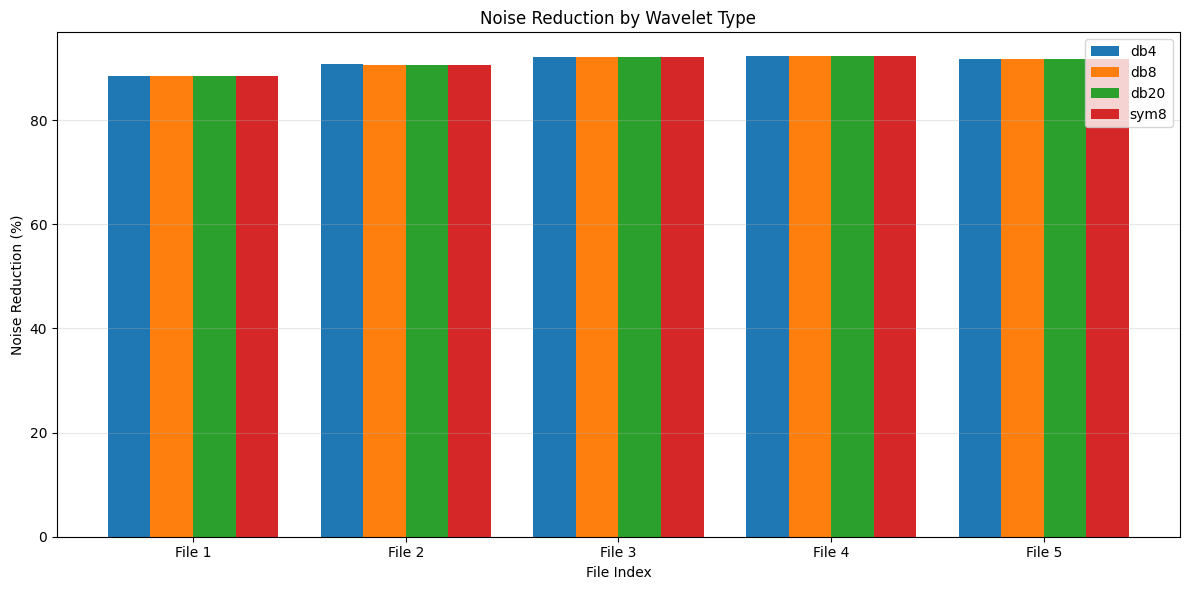

In [16]:
# Visualize wavelet comparison
df_wavelets = pd.DataFrame(collector3.results)

wavelets = ['db4', 'db8', 'db20', 'sym8']
reduction_cols = [f'{w}_reduction_pct' for w in wavelets]

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_wavelets))
width = 0.2

for i, (wavelet, col) in enumerate(zip(wavelets, reduction_cols)):
    ax.bar(x + i * width, df_wavelets[col], width, label=wavelet)

ax.set_xlabel('File Index')
ax.set_ylabel('Noise Reduction (%)')
ax.set_title('Noise Reduction by Wavelet Type')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([f'File {i+1}' for i in range(len(df_wavelets))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Custom Experiment Template

Use this template to create your own experiments.

In [17]:
def custom_pipeline(filepath):
    """
    Your custom analysis pipeline.
    
    Returns
    -------
    dict
        Dictionary with your custom metrics
    """
    # Read data
    data = dolphain.read_ears_file(filepath)
    acoustic = data['data']
    
    # Your analysis here
    # ...
    
    results = {
        # Add your metrics
        'metric1': 0.0,
        'metric2': 0.0,
    }
    
    return results

# Run your experiment
# processor = dolphain.BatchProcessor(verbose=True)
# collector = processor.process_files(selected_files, custom_pipeline)
# collector.print_summary()

## Export Results

Save results for later analysis or reporting.

In [18]:
# Save to CSV
# df_stats.to_csv('experiment_basic_stats.csv', index=False)
# df_denoise.to_csv('experiment_denoising.csv', index=False)
# print("Results saved!")

## Summary

This notebook provides a complete framework for batch experiments:

✅ **Data discovery and selection**  
✅ **Pipeline-based processing**  
✅ **Performance timing**  
✅ **Result collection and aggregation**  
✅ **Statistical summaries**  
✅ **Visualization**  
✅ **Error handling**

### Next Steps

1. Modify pipelines for your specific experiments
2. Test on different file subsets
3. Compare different processing parameters
4. Optimize for performance
5. Export results for reports